In [1]:
!git clone https://github.com/kailas93/Tree-Species-Identification.git

Cloning into 'Tree-Species-Identification'...
remote: Repository not found.
fatal: repository 'https://github.com/kailas93/Tree-Species-Identification.git/' not found


In [2]:
import os

repo_path = "Tree_Species_Dataset"  # Adjust if cloned to a different name
print("Contents:", os.listdir(repo_path))


Contents: ['amla', 'asopalav', 'babul', 'bamboo', 'banyan', 'bili', 'cactus', 'champa', 'coconut', 'garmalo', 'gulmohor', 'gunda', 'jamun', 'kanchan', 'kesudo', 'khajur', 'mango', 'motichanoti', 'neem', 'nilgiri', 'other', 'pilikaren', 'pipal', 'saptaparni', 'shirish', 'simlo', 'sitafal', 'sonmahor', 'sugarcane', 'vad']


In [3]:
class_dirs = os.listdir(repo_path)
print(f"Number of classes: {len(class_dirs)}")


Number of classes: 30


In [4]:
import glob

image_paths = []
labels = []

for class_name in os.listdir(repo_path):
    class_folder = os.path.join(repo_path, class_name)
    if os.path.isdir(class_folder):
        for img_file in os.listdir(class_folder):
            image_paths.append(os.path.join(class_folder, img_file))
            labels.append(class_name)

print(f"Total images: {len(image_paths)}")


Total images: 1600


In [5]:
import pandas as pd

class_counts = {cls: len(os.listdir(os.path.join(repo_path, cls))) for cls in class_dirs}
class_counts_df = pd.DataFrame.from_dict(class_counts, orient='index', columns=['Image Count'])
print(class_counts_df.sort_values('Image Count', ascending=False).head())
print("shape: ",class_counts_df.shape)


        Image Count
other           150
amla             50
babul            50
bamboo           50
banyan           50
shape:  (30, 1)


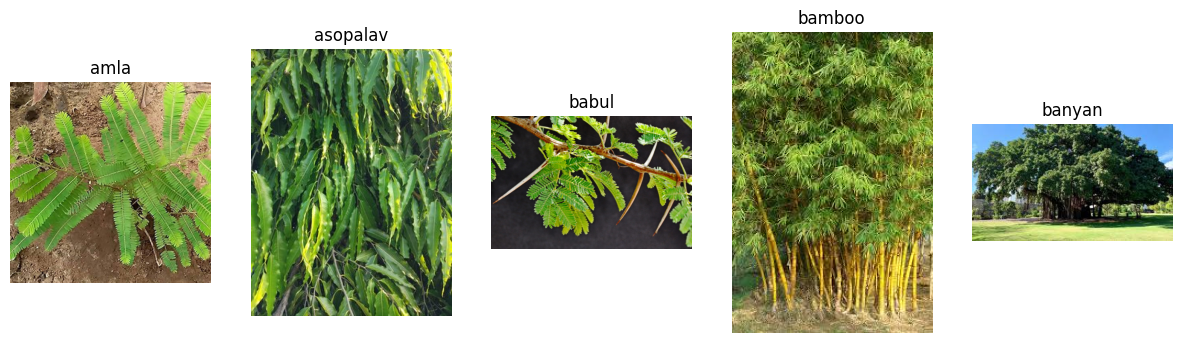

In [6]:
import matplotlib.pyplot as plt
from PIL import Image

def show_sample_images(repo_path, class_dirs, n=5):
    plt.figure(figsize=(15, 10))
    for i, class_dir in enumerate(class_dirs[:n]):
        img_path = os.path.join(repo_path, class_dir, os.listdir(os.path.join(repo_path, class_dir))[0])
        img = Image.open(img_path)
        plt.subplot(1, n, i+1)
        plt.imshow(img)
        plt.title(class_dir)
        plt.axis('off')
    plt.show()

show_sample_images(repo_path, class_dirs)


In [7]:
image_shapes = []

for class_dir in class_dirs:
    for img_file in os.listdir(os.path.join(repo_path, class_dir)):
        img_path = os.path.join(repo_path, class_dir, img_file)
        img = Image.open(img_path)
        image_shapes.append(img.size)

# DataFrame and Summary
import pandas as pd

shapes_df = pd.DataFrame(image_shapes, columns=["Width", "Height"])
shapes_df.head()

,Width,Height
0,1000,1000
1,1000,667
2,750,585
3,1025,1390
4,839,921


In [8]:
print(shapes_df.describe())


             Width       Height
count  1600.000000  1600.000000
mean    312.623125   269.821875
std     296.220501   278.014229
min     141.000000   128.000000
25%     225.000000   183.000000
50%     259.000000   200.000000
75%     275.000000   259.000000
max    4000.000000  4032.000000


In [9]:
import hashlib
from collections import defaultdict

hashes = defaultdict(list)

for class_dir in class_dirs:
    for img_file in os.listdir(os.path.join(repo_path, class_dir)):
        img_path = os.path.join(repo_path, class_dir, img_file)
        with open(img_path, 'rb') as f:
            file_hash = hashlib.md5(f.read()).hexdigest()
            hashes[file_hash].append(img_path)

# Filter duplicates
duplicates = {h: files for h, files in hashes.items() if len(files) > 1}
print("Duplicate image sets found:", len(duplicates))


Duplicate image sets found: 82


In [10]:
corrupt_images = []

for class_dir in class_dirs:
    for img_file in os.listdir(os.path.join(repo_path, class_dir)):
        img_path = os.path.join(repo_path, class_dir, img_file)
        try:
            img = Image.open(img_path)
            img.verify()
        except Exception as e:
            corrupt_images.append(img_path)

print("Corrupted images:", len(corrupt_images))


Corrupted images: 0


Duplicate set 1:


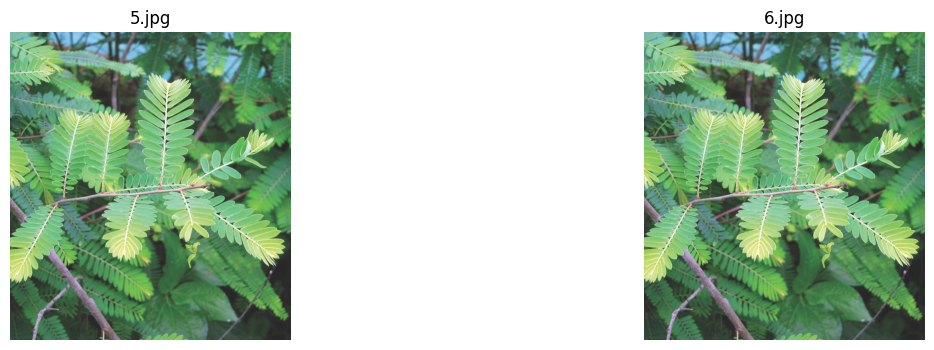

Duplicate set 2:


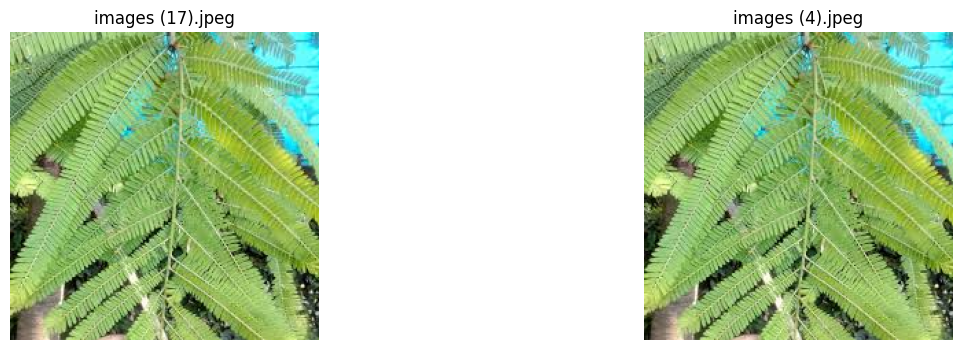

Duplicate set 3:


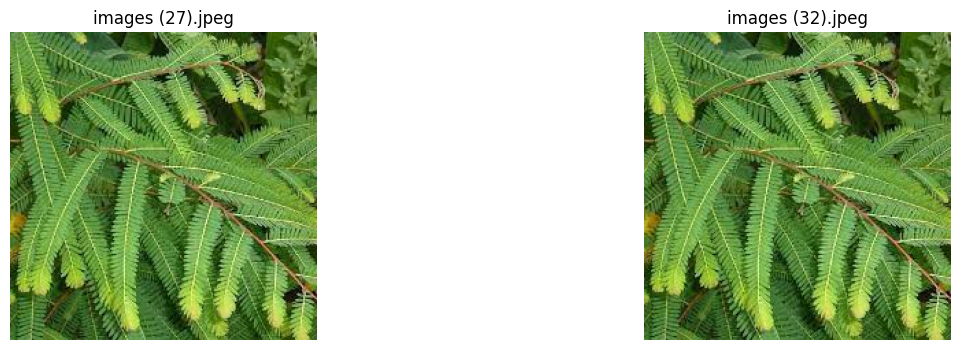

In [11]:
import matplotlib.pyplot as plt
from PIL import Image

def show_duplicate_sets(duplicates, sets_to_display=3):
    shown = 0
    for hash_val, dup_paths in duplicates.items():
        if shown >= sets_to_display:
            break
        print(f"Duplicate set {shown + 1}:")
        plt.figure(figsize=(15, 4))
        for i, img_path in enumerate(dup_paths):
            try:
                img = Image.open(img_path)
                plt.subplot(1, len(dup_paths), i+1)
                plt.imshow(img)
                plt.title(os.path.basename(img_path))
                plt.axis('off')
            except:
                continue
        plt.show()
        shown += 1

show_duplicate_sets(duplicates, sets_to_display=3)


In [12]:
import os

removed_count = 0

for dup_list in duplicates.values():
    # Keep the first, delete rest
    for img_path in dup_list[1:]:
        try:
            os.remove(img_path)
            removed_count += 1
        except Exception as e:
            print(f"Error deleting {img_path}: {e}")

print(f"✅ Removed {removed_count} duplicate images.")


✅ Removed 86 duplicate images.


In [13]:
# Re-check to confirm duplicates removed
hashes = defaultdict(list)

for class_dir in class_dirs:
    for img_file in os.listdir(os.path.join(repo_path, class_dir)):
        img_path = os.path.join(repo_path, class_dir, img_file)
        with open(img_path, 'rb') as f:
            file_hash = hashlib.md5(f.read()).hexdigest()
            hashes[file_hash].append(img_path)

duplicates = {h: files for h, files in hashes.items() if len(files) > 1}
print("🔁 Duplicates remaining:", len(duplicates))


🔁 Duplicates remaining: 0


In [14]:
from PIL import Image
import pandas as pd

# Gather image info
image_info = []

for class_dir in class_dirs:
    class_path = os.path.join(repo_path, class_dir)
    for img_file in os.listdir(class_path):
        img_path = os.path.join(class_path, img_file)
        try:
            with Image.open(img_path) as img:
                width, height = img.size
                image_info.append({
                    'path': img_path,
                    'width': width,
                    'height': height,
                    'class': class_dir
                })
        except:
            continue

df_sizes = pd.DataFrame(image_info)

# Define thresholds
small_imgs = df_sizes[(df_sizes['width'] < 150) | (df_sizes['height'] < 150)]
large_imgs = df_sizes[(df_sizes['width'] > 1000) | (df_sizes['height'] > 2000)]

print(f"🔻 Very small images: {len(small_imgs)}")
print(f"🔺 Very large images: {len(large_imgs)}")


🔻 Very small images: 20
🔺 Very large images: 40


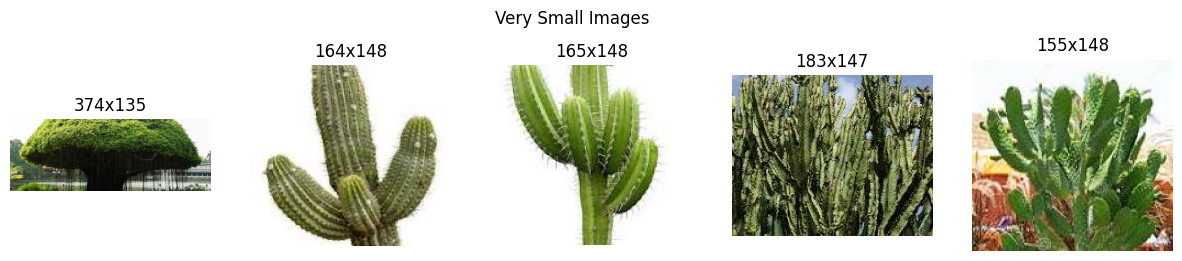

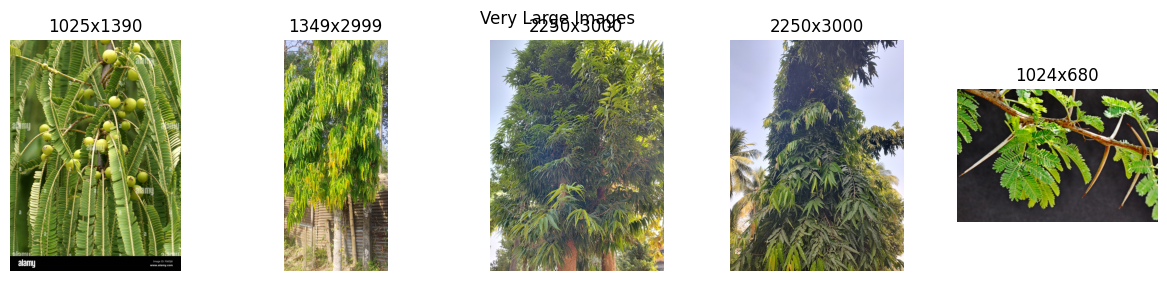

In [15]:
def show_images(df_subset, title, n=5):
    plt.figure(figsize=(15, 3))
    for i, (_, row) in enumerate(df_subset.head(n).iterrows()):
        img = Image.open(row['path'])
        plt.subplot(1, n, i+1)
        plt.imshow(img)
        plt.title(f"{row['width']}x{row['height']}")
        plt.axis('off')
    plt.suptitle(title)
    plt.show()

show_images(small_imgs, "Very Small Images")
show_images(large_imgs, "Very Large Images")


In [16]:
import os

# Combine both sets
outliers = pd.concat([small_imgs, large_imgs])

# Remove them
removed_count = 0
for path in outliers['path']:
    try:
        os.remove(path)
        removed_count += 1
    except Exception as e:
        print(f"Failed to remove {path}: {e}")

print(f"🗑️ Removed {removed_count} outlier images (small + large).")


🗑️ Removed 60 outlier images (small + large).


In [17]:
# Recalculate sizes
image_info = []

for class_dir in class_dirs:
    class_path = os.path.join(repo_path, class_dir)
    for img_file in os.listdir(class_path):
        img_path = os.path.join(class_path, img_file)
        try:
            with Image.open(img_path) as img:
                width, height = img.size
                image_info.append({
                    'path': img_path,
                    'width': width,
                    'height': height,
                    'class': class_dir
                })
        except:
            continue

df_sizes = pd.DataFrame(image_info)
print(df_sizes[['width', 'height']].describe())


             width       height
count  1454.000000  1454.000000
mean    275.872765   239.044704
std     117.507849   117.197342
min     150.000000   150.000000
25%     225.000000   183.000000
50%     259.000000   198.000000
75%     275.000000   256.000000
max    1000.000000  1247.000000


In [18]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define parameters
IMG_HEIGHT = 224
IMG_WIDTH = 224
BATCH_SIZE = 32

# Augmentation and rescaling
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    zoom_range=0.2,
    shear_range=0.2,
    horizontal_flip=True
)

train_gen = datagen.flow_from_directory(
    repo_path,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

val_gen = datagen.flow_from_directory(
    repo_path,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)


C:\Users\Satyam\AppData\Roaming\Python\Python313\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/attr_value.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
C:\Users\Satyam\AppData\Roaming\Python\Python313\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/tensor.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
C:\Users\Satyam\AppData\Roaming\Python\Python313\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/resource_handle.proto. Plea

Found 1177 images belonging to 30 classes.
Found 277 images belonging to 30 classes.


In [20]:
# Create a simple CNN model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    MaxPooling2D(2, 2),
    
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    
    Flatten(),
    Dropout(0.5),
    Dense(512, activation='relu'),
    Dropout(0.3),
    Dense(train_gen.num_classes, activation='softmax')
])

model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

C:\Users\Satyam\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 24, 24, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 18432)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 18432)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     9,437,696 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 30)             │        15,390 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,693,918 (36.98 MB)

 Trainable params: 9,693,918 (36.98 MB)

 Non-trainable params: 0 (0.00 B)

In [21]:
EPOCHS = 10

history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=EPOCHS
)


C:\Users\Satyam\AppData\Roaming\Python\Python313\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 139s 4s/step - accuracy: 0.0935 - loss: 3.2961 - val_accuracy: 0.1300 - val_loss: 3.0423
Epoch 2/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 139s 4s/step - accuracy: 0.0935 - loss: 3.2961 - val_accuracy: 0.1300 - val_loss: 3.0423
Epoch 2/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step - accuracy: 0.1368 - loss: 3.0626 - val_accuracy: 0.1805 - val_loss: 2.9103
Epoch 3/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step - accuracy: 0.1368 - loss: 3.0626 - val_accuracy: 0.1805 - val_loss: 2.9103
Epoch 3/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 20s 530ms/step - accuracy: 0.1699 - loss: 2.9415 - val_accuracy: 0.1805 - val_loss: 2.8951
Epoch 4/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 20s 530ms/step - accuracy: 0.1699 - loss: 2.9415 - val_accuracy: 0.1805 - val_loss: 2.8951
Epoch 4/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 20s 527ms/step - accuracy: 0.1776 - loss: 2.8581 - val_accuracy: 0.2166 - val_loss: 2.7948
Epoch 5/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 20s 527ms/step - accuracy: 0.1776 - loss: 2.8581 - val_accuracy: 0.21

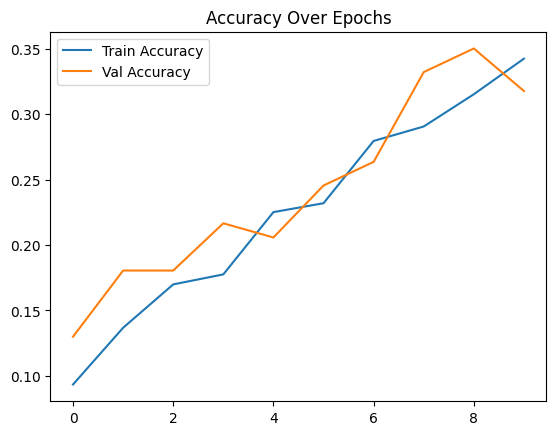

In [22]:
# Plot accuracy/loss curves
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title("Accuracy Over Epochs")
plt.show()

# Save model
model.save("tree_species_model.h5")


In [23]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define image properties
IMG_HEIGHT = 224
IMG_WIDTH = 224
BATCH_SIZE = 32

# Data generators
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True
)

train_generator = datagen.flow_from_directory(
    repo_path,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

val_generator = datagen.flow_from_directory(
    repo_path,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)

# Number of output classes
num_classes = train_generator.num_classes

# Build a basic CNN model
model_cnn = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

model_cnn.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

# Train the model
EPOCHS = 10
history_cnn = model_cnn.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=val_generator
)

# Save the model
model_cnn.save('basic_cnn_tree_species.h5')
print("✅ Basic CNN model saved as 'basic_cnn_tree_species.h5'")


Found 1177 images belonging to 30 classes.
Found 277 images belonging to 30 classes.
Found 277 images belonging to 30 classes.
Epoch 1/10
Epoch 1/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 23s 597ms/step - accuracy: 0.0654 - loss: 3.6029 - val_accuracy: 0.0903 - val_loss: 3.3040
Epoch 2/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 23s 597ms/step - accuracy: 0.0654 - loss: 3.6029 - val_accuracy: 0.0903 - val_loss: 3.3040
Epoch 2/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 21s 572ms/step - accuracy: 0.0867 - loss: 3.2660 - val_accuracy: 0.0975 - val_loss: 3.1445
Epoch 3/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 21s 572ms/step - accuracy: 0.0867 - loss: 3.2660 - val_accuracy: 0.0975 - val_loss: 3.1445
Epoch 3/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 21s 553ms/step - accuracy: 0.1172 - loss: 3.1375 - val_accuracy: 0.1552 - val_loss: 2.9819
Epoch 4/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 21s 553ms/step - accuracy: 0.1172 - loss: 3.1375 - val_accuracy: 0.1552 - val_loss: 2.9819
Epoch 4/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 25s 670ms/step - accuracy: 0.1359 - loss: 3.0266 -

✅ Basic CNN model saved as 'basic_cnn_tree_species.h5'


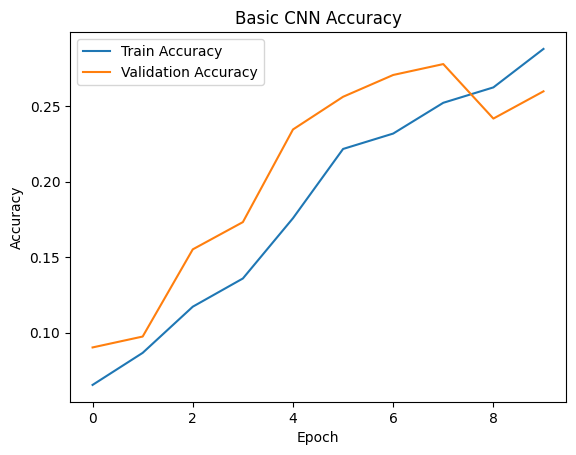

In [24]:
import matplotlib.pyplot as plt

plt.plot(history_cnn.history['accuracy'], label='Train Accuracy')
plt.plot(history_cnn.history['val_accuracy'], label='Validation Accuracy')
plt.title("Basic CNN Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(30, activation='softmax')  # For 30 classes
])

model.compile(optimizer=Adam(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(train_generator, validation_data=val_generator, epochs=25)

model.save("improved_cnn_model.h5")


Epoch 1/25
37/37 ━━━━━━━━━━━━━━━━━━━━ 92s 2s/step - accuracy: 0.0986 - loss: 4.2913 - val_accuracy: 0.0289 - val_loss: 6.3941
Epoch 2/25
37/37 ━━━━━━━━━━━━━━━━━━━━ 92s 2s/step - accuracy: 0.0986 - loss: 4.2913 - val_accuracy: 0.0289 - val_loss: 6.3941
Epoch 2/25
37/37 ━━━━━━━━━━━━━━━━━━━━ 44s 1s/step - accuracy: 0.1147 - loss: 3.2418 - val_accuracy: 0.0325 - val_loss: 10.9642
Epoch 3/25
37/37 ━━━━━━━━━━━━━━━━━━━━ 44s 1s/step - accuracy: 0.1147 - loss: 3.2418 - val_accuracy: 0.0325 - val_loss: 10.9642
Epoch 3/25
37/37 ━━━━━━━━━━━━━━━━━━━━ 58s 2s/step - accuracy: 0.1376 - loss: 3.1678 - val_accuracy: 0.0325 - val_loss: 13.6014
Epoch 4/25
37/37 ━━━━━━━━━━━━━━━━━━━━ 58s 2s/step - accuracy: 0.1376 - loss: 3.1678 - val_accuracy: 0.0325 - val_loss: 13.6014
Epoch 4/25
37/37 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step - accuracy: 0.1436 - loss: 3.1021 - val_accuracy: 0.0325 - val_loss: 18.9418
Epoch 5/25
37/37 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step - accuracy: 0.1436 - loss: 3.1021 - val_accuracy: 0.0325 - val_

: 